In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from bs4 import BeautifulSoup
import re
import nltk
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords

In [5]:
df = pd.read_csv('NLPlabeledData.tsv',delimiter="\t",quoting=3)

In [6]:
df.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [11]:
len(df)

25000

In [12]:
# Stopwords'ü temizlemek için nltk kütüphanesinden stopword kelime setini bilgisayarımıza indirmemiz gerekiyor
# bu işlemi nltk ile yapıyoruz
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\beek6\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

# Veri temizleme işlemleri
### Öncelikle BS modülünü kullanarak HTML taglerini review cümlelerinden sileceğiz
Önce tek bir review seçelim nasıl yapıldığına bakalım

In [13]:
sample_review = df.review[0]
sample_review

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally

In [14]:
sample_review = BeautifulSoup(sample_review).get_text()
sample_review
# <br> etiketleri gitti.

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.The actual feature film bit when it finally starts is only on for 2

In [15]:
# Noktalama işaretleri ve sayılardan temizliyoruz - regex kullanarak...
sample_review = re.sub("[^a-zA-Z]", ' ',sample_review)
sample_review

' With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    m

In [16]:
# her harfi küçük yapıcaz makine öğrenim algoritmalarımızın büyük harfle başlayan kelimeleri farklı kelime olarak
# algılamaması için yapıyoruz bunu:
sample_review = sample_review.lower()
sample_review

' with all this stuff going down at the moment with mj i ve started listening to his music  watching the odd documentary here and there  watched the wiz and watched moonwalker again  maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  some of it has subtle messages about mj s feeling towards the press and also the obvious message of drugs are bad m kay visually impressive but of course this is all about michael jackson so unless you remotely like mj in anyway then you are going to hate this and find it boring  some may call mj an egotist for consenting to the making of this movie but mj and most of his fans would say that he made it for the fans which if true is really nice of him the actual feature film bit when it finally starts is only on for    m

In [17]:
sample_review = sample_review.split()

In [18]:
sample_review

['with',
 'all',
 'this',
 'stuff',
 'going',
 'down',
 'at',
 'the',
 'moment',
 'with',
 'mj',
 'i',
 've',
 'started',
 'listening',
 'to',
 'his',
 'music',
 'watching',
 'the',
 'odd',
 'documentary',
 'here',
 'and',
 'there',
 'watched',
 'the',
 'wiz',
 'and',
 'watched',
 'moonwalker',
 'again',
 'maybe',
 'i',
 'just',
 'want',
 'to',
 'get',
 'a',
 'certain',
 'insight',
 'into',
 'this',
 'guy',
 'who',
 'i',
 'thought',
 'was',
 'really',
 'cool',
 'in',
 'the',
 'eighties',
 'just',
 'to',
 'maybe',
 'make',
 'up',
 'my',
 'mind',
 'whether',
 'he',
 'is',
 'guilty',
 'or',
 'innocent',
 'moonwalker',
 'is',
 'part',
 'biography',
 'part',
 'feature',
 'film',
 'which',
 'i',
 'remember',
 'going',
 'to',
 'see',
 'at',
 'the',
 'cinema',
 'when',
 'it',
 'was',
 'originally',
 'released',
 'some',
 'of',
 'it',
 'has',
 'subtle',
 'messages',
 'about',
 'mj',
 's',
 'feeling',
 'towards',
 'the',
 'press',
 'and',
 'also',
 'the',
 'obvious',
 'message',
 'of',
 'drugs',

In [19]:
len(sample_review)

437

In [20]:
# stopwords leri temizliyoruz
swords = set(stopwords.words("english"))
swords
sample_review = [w for w in sample_review if w not in swords] 
sample_review

['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary',
 'watched',
 'wiz',
 'watched',
 'moonwalker',
 'maybe',
 'want',
 'get',
 'certain',
 'insight',
 'guy',
 'thought',
 'really',
 'cool',
 'eighties',
 'maybe',
 'make',
 'mind',
 'whether',
 'guilty',
 'innocent',
 'moonwalker',
 'part',
 'biography',
 'part',
 'feature',
 'film',
 'remember',
 'going',
 'see',
 'cinema',
 'originally',
 'released',
 'subtle',
 'messages',
 'mj',
 'feeling',
 'towards',
 'press',
 'also',
 'obvious',
 'message',
 'drugs',
 'bad',
 'kay',
 'visually',
 'impressive',
 'course',
 'michael',
 'jackson',
 'unless',
 'remotely',
 'like',
 'mj',
 'anyway',
 'going',
 'hate',
 'find',
 'boring',
 'may',
 'call',
 'mj',
 'egotist',
 'consenting',
 'making',
 'movie',
 'mj',
 'fans',
 'would',
 'say',
 'made',
 'fans',
 'true',
 'really',
 'nice',
 'actual',
 'feature',
 'film',
 'bit',
 'finally',
 'starts',
 'minutes',
 'excluding',
 'smooth',
 'crim

In [21]:
print(swords)

{'their', 'once', 'no', 'all', 'only', "wasn't", "doesn't", 'these', 'at', 'hasn', 'with', 'from', 'will', 'is', 'wouldn', "wouldn't", 'such', 'himself', 'do', 'was', 'where', 'being', 'm', 'itself', 'above', 'he', "hadn't", 'o', 'she', "weren't", 'my', "mustn't", 'when', 'them', 'an', "mightn't", 'yourself', 'who', 'now', 'and', "she's", 'hers', 'up', 'how', "it's", 'after', 'be', 'same', 'him', 'or', 'between', 'had', 'having', 'whom', 'more', 'themselves', 'weren', 'why', 'am', 'were', 'here', "don't", 'by', 'before', 's', 'until', 'does', 'just', 'about', 'won', 'are', 'y', 'theirs', 'haven', 'yours', 'then', 'over', 'herself', "didn't", 'ours', 'isn', 'ma', 'her', 'nor', 'doesn', 'shouldn', "haven't", 'yourselves', 'doing', 'off', "that'll", 'which', 'further', 'don', 'not', "aren't", 'hadn', "should've", 'ain', "you're", 'through', 'your', 'myself', 'didn', "shan't", 'if', 'that', 'both', 'needn', 'his', 'they', "you'll", 'ourselves', 'has', 'but', 'into', 't', 'on', 'a', 'been',

# Şimdi tüm verileri yapay zeka için ayarlayalım az önce tek tek yapmıştık

In [10]:
def process(review):
    # Review html tag'leri ile geliyor
    review = BeautifulSoup(review).get_text() # Html taglerini temizledik
    # Şimdi noktalama işaretlerini temizleyeceğiz
    review = re.sub("[^a-zA-Z]", ' ',review) # işaretleri boşluk yaptı
    # Şimdi stop words ler için her kelimeyi küçük yapıp kelime kelime bölüyoruz cümleyi
    review = review.lower()
    review = review.split()
    # review without stopwords
    swords = set(stopwords.words('english'))
    review = [w for w in review if w not in swords]
    # splitted paragrafları space ile birleştiriyoruz
    return(" ".join(review))

In [11]:
# training datamızı yukarıdaki fonskiyon yardımıyla temizliyoruz
# her 1000 review sonrası bir satır yazdırarak gidişatı kontrol ediyoruz
train_x_all= []

for r in range(len(df["review"])):
    if (r+1)%1000 == 0:
        print("No of reviews processed =", r+1)
    train_x_all.append(process(df["review"][r]))

C:\Users\beek6\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


No of reviews processed = 1000
No of reviews processed = 2000
No of reviews processed = 3000
No of reviews processed = 4000
No of reviews processed = 5000
No of reviews processed = 6000
No of reviews processed = 7000
No of reviews processed = 8000
No of reviews processed = 9000
No of reviews processed = 10000
No of reviews processed = 11000
No of reviews processed = 12000
No of reviews processed = 13000
No of reviews processed = 14000
No of reviews processed = 15000
No of reviews processed = 16000
No of reviews processed = 17000
No of reviews processed = 18000
No of reviews processed = 19000
No of reviews processed = 20000
No of reviews processed = 21000
No of reviews processed = 22000
No of reviews processed = 23000
No of reviews processed = 24000
No of reviews processed = 25000


In [12]:
x = train_x_all
y = np.array(df['sentiment']) # duygu 1 mi 0 mı bunun bilgilerini verdik y değişkenine.

# train test split
train_x,test_x,y_train,y_test = train_test_split(x,y, test_size = 0.1, random_state = 42) # test için kullanılacak alanı belirledik

# Bag of Words oluşturma kısmı.
verilerimizi temizledik ancak yapay zekanın çalışması için bu metin tabanlı verileri sayılara ve bag of words denilen matrise çevirmek gerekiyor
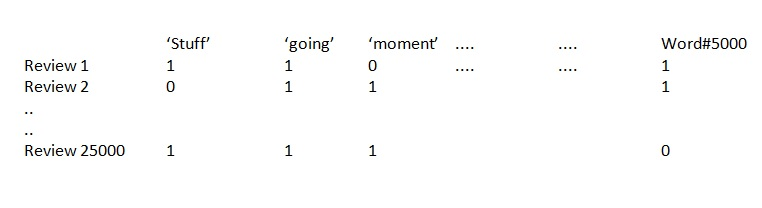
### Yani olay şu her kelimeyi sütun yapıyor her cümleyi satır eğer cümle de kelime varsa sütun da bulunan kelime 1 yoksa 0 oluyor .

In [14]:
vectorizer = CountVectorizer(max_features = 5000)
train_x = vectorizer.fit_transform(train_x)

In [15]:
train_x

<22500x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 1776690 stored elements in Compressed Sparse Row format>

In [16]:
# Array'e dönüştürelim çünkü fit işlemi bunu istiyor
train_x = train_x.toarray()

In [18]:
train_y = y_train
train_x.shape, train_y.shape

((22500, 5000), (22500,))

In [19]:
train_y

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

# Random Forest Modeli oluşturup fit ediyoruz

In [27]:
model = RandomForestClassifier(n_estimators=200)
model.fit(train_x, train_y)

RandomForestClassifier(n_estimators=200)

## Test datamızı ayarlıyoruz...
### Aynı işlemleri test datamız için yapacağız.

In [23]:
test_xx = vectorizer.transform(test_x)

In [24]:
test_xx.toarray()
test_xx.shape

(2500, 5000)

## Prediction yapıyoruz

In [25]:
test_predict = model.predict(test_xx)
dogruluk = roc_auc_score(y_test, test_predict)

In [26]:
print("Doğruluk oranı: %", dogruluk * 100)

Doğruluk oranı: % 84.1663593714789


In [29]:
model.predict(test_xx[1335])

array([1], dtype=int64)

In [31]:
print(test_x[1335])

overall movie excellent time interesting many generations come although plot accurate book everything correct movie skip far ahead miss important parts found book ready immediately wished made movie found movie yet later found movie bargain bin wal mart decided buy see expected overall give movies good parts relative accuracy overall making sense bad parts large time skips small noticeable inaccuracies
